<a href="https://colab.research.google.com/github/JannatL/Quiz2_Automobiles/blob/main/J_Lily_Project3_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 2: Data Preperation and Feature Engineering
### Jannat Lily

In [1]:
import pandas as pd
import numpy as np

#Define column names based on the .names file
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "price"
]

#Import Data
url = "https://raw.githubusercontent.com/JannatL/Quiz2_Automobiles/main/imports-85.data"
df = pd.read_csv(url, names=column_names, na_values="?")

#Preview 5 rows
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


##**Exploratory Data Analysis (EDA)**

### A brief summary of the data:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


# Rows and columns
print("Number of rows and columns:", df.shape)

df.describe()

Number of rows and columns: (205, 26)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Observations from the numerical data:

- The price of cars ranges from 5,000 to 45,000 USD, which is a large range.
- **Engine-related attributes** (`engine-size`, `horsepower`, `curb-weight`):
  - These show relatively high standard deviations, suggesting variability in car power and size across brands and models.
  - They are also strongly correlated with price, as seen in earlier plots, making them important predictors.
- **Normalized-losses** has a noticeably lower count than other fields, which indicates missing values.
- **Peak-rpm** has a max of 6600, but the lower percentiles are clustered so it is possibly skewed.

### Check for Missing Data:

In [6]:
print("Missing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing values per column:
normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


- Normalized Losses Column has the most missing data
- bore and stroke are related to engine specs
- horsepower and peak-rpm are related to performance
- num-of-doors affects body style
- price is our target variable and is highly sensitive

###Identify Datatypes:

In [10]:
# Separate numeric and categorical
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric variables:", num_cols)
print("Categorical variables:", cat_cols)

Numeric variables: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
Categorical variables: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


### **Histogram of Numeric Variables:**

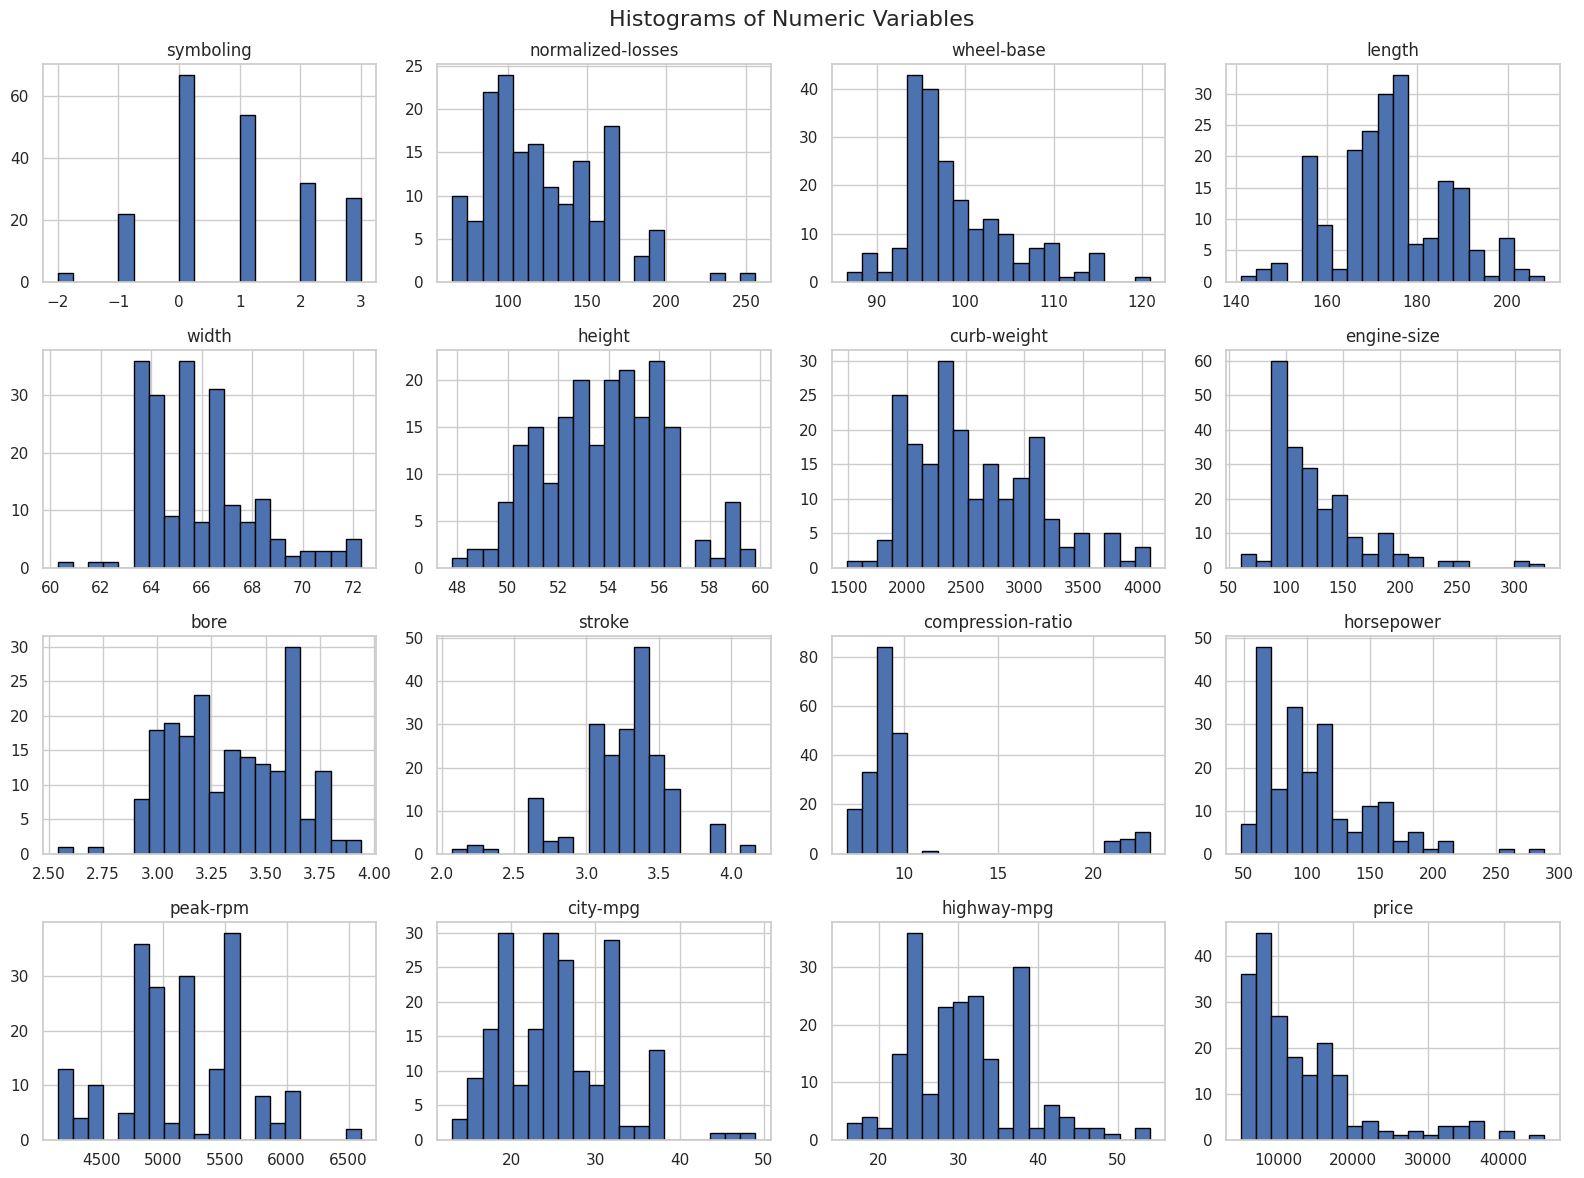

In [13]:
#ignore warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot numeric distributions
df[num_cols].hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()


###Numeric Variable Distributions

- Many features are skewed, such as price (right-skewed), curb-weight, and engine-size.
- This justifies scaling later.
- Engine size is strongly positively correlated with price
- Curb weight also affects price, as well as feul efficiency and insurance
- Strong correlation between horsepower and both performance and price
- Outliers are present in compression-ratio, horsepower, and peak-rpm, which may distort model training.

###**Detection of Outliers Using Boxplots:**

###Numeric Variables:

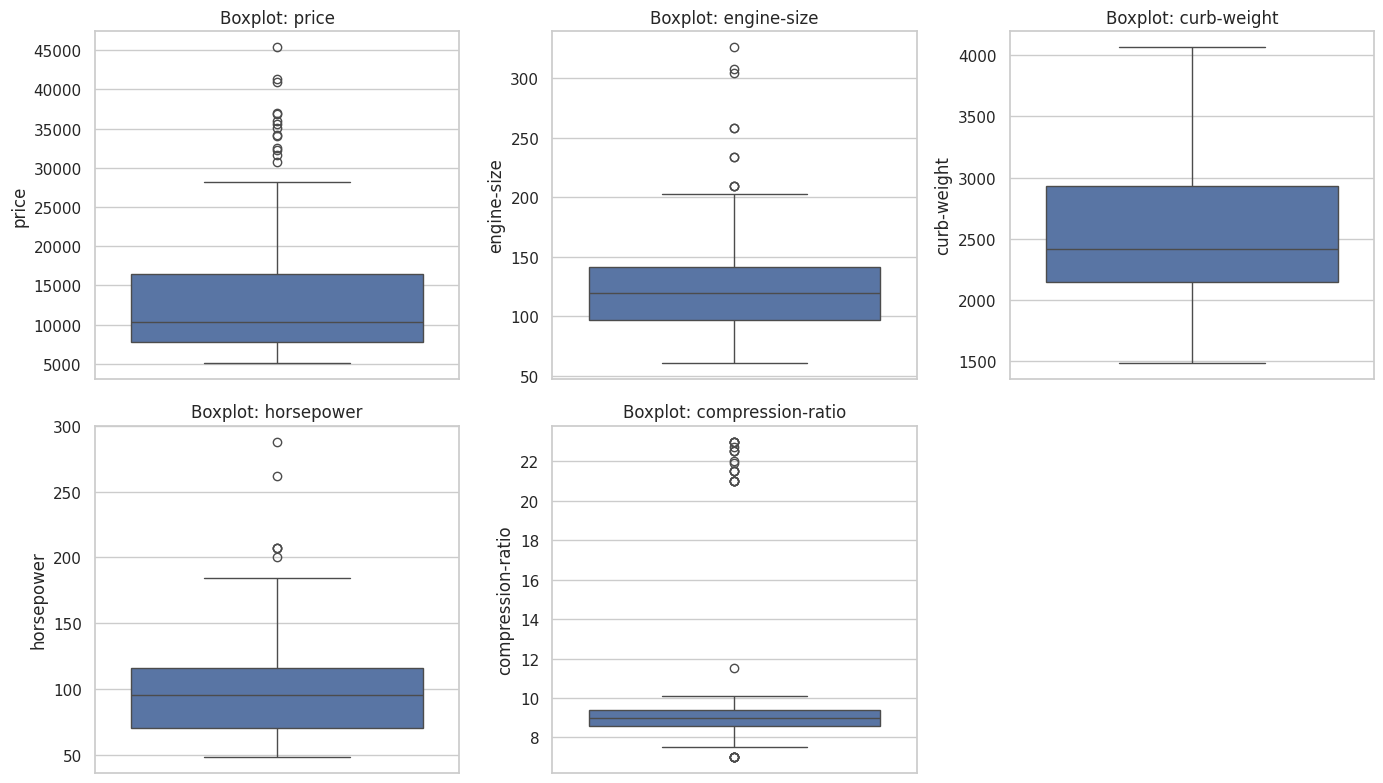

In [16]:
important_cols = ['price', 'engine-size', 'curb-weight', 'horsepower', 'compression-ratio']
plt.figure(figsize=(14, 8))
for i, col in enumerate(important_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()


- We want to detect the outliers that are most likely to affect price, to understand the skewed statistics
- Numeric variables more likely to affect car price: engine size, curb weight, horse power, compression ratio
- The wide price range indicates that scaling may be needed
- Engine size and Horse power have few outliers at higher end (right skew)
- Compression ratio has some extreme outliers
- Curb weight have less outliers but a large range, so many need scaling

### Catergorical Variables:

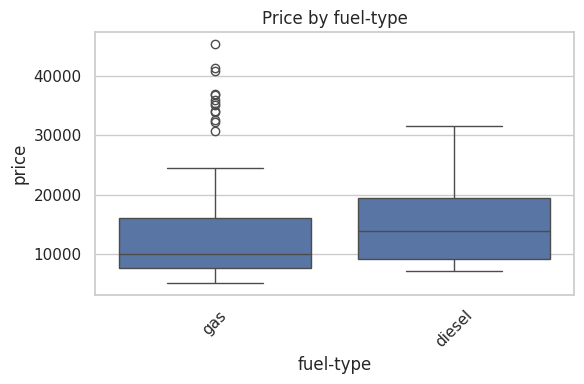

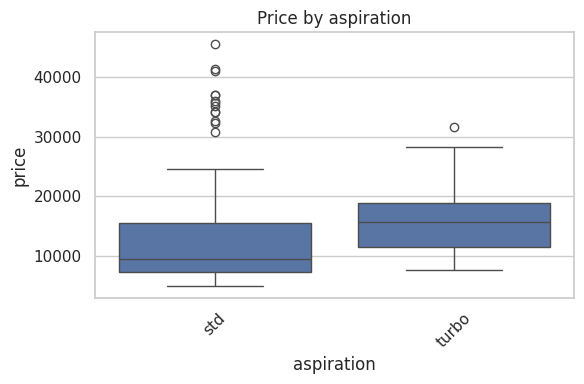

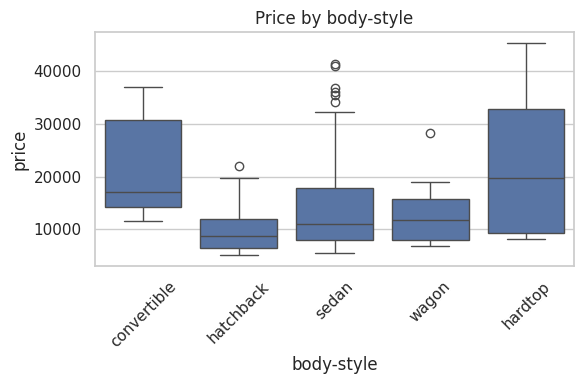

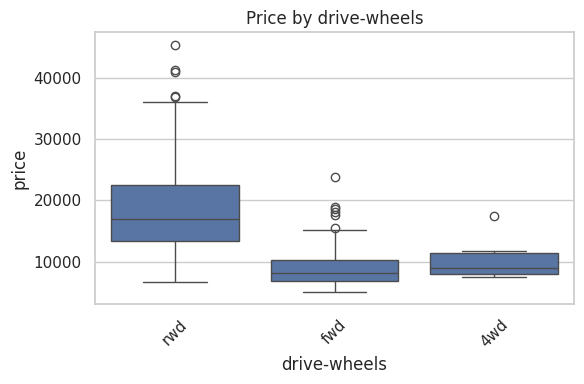

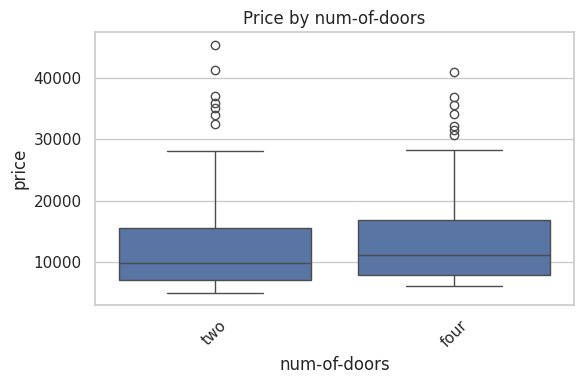

In [17]:
# Categorical variables
for cat in ['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'num-of-doors']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cat, y="price", data=df)
    plt.title(f"Price by {cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


- Cars with turbo aspiration and gas fuel tend to have higher prices
- Rear-wheel drive (rwd) vehicles generally cost more
- 4-door vs 2-door has some impact, depending on the body-style
- These relationships justify encoding

##**Data Preperation and Feature Engineering**
### **Feature Scaling**:

Certain numeric variables in the dataset need feature scaling before they can used in modeling. Because algorithms are sensitive to the magnitude of feature values, variables with large numeric ranges can dominate the learning process and skew the results.

The variables that need scaling due to their large ranges are:
- Price (5000 to 45000 USD)
- Engine-size (60 to 320 cubic inches)
- Curb-weight (1500 to 4000 lbs)
- Horsepower (48 to 288)

Compression rating doesn't have a large range, but needs scaling due to the fact that it has a few outliers above 20 that skew results. Similarly, Stoke and Bore have outliers on the high end and also benefit from scaling.

We will use MinMaxScaler to scale **engine-size** and **stroke** and compare the results to the orignals. MinMax scaling should bring both variables into range [0,1] without affecting other aspects of the data.


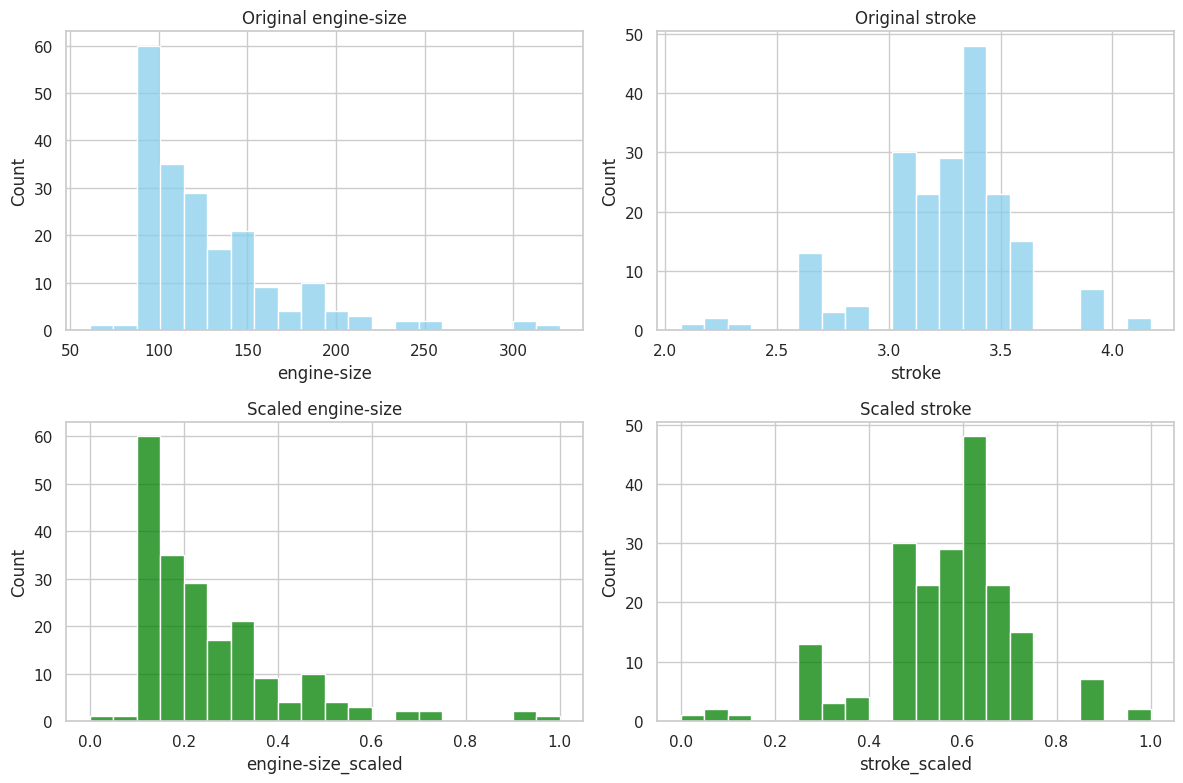

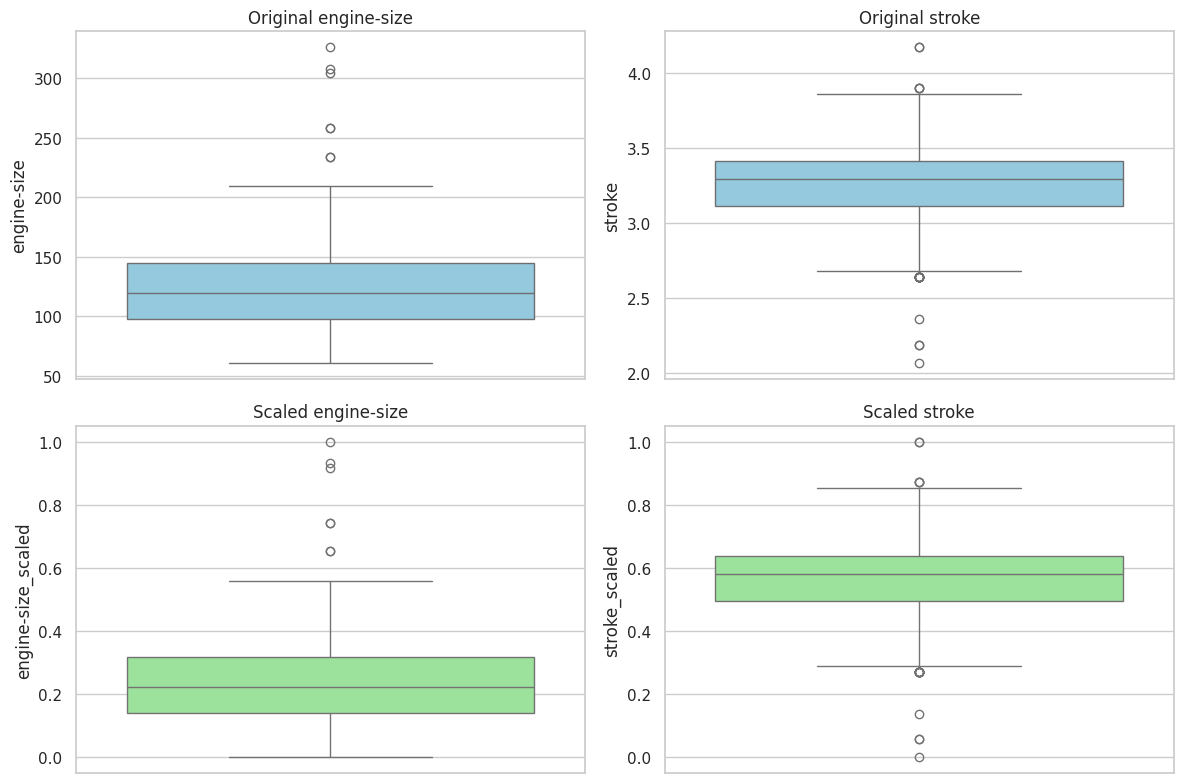

In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Fix columns
df[['engine-size', 'stroke']] = df[['engine-size', 'stroke']].astype(float)
df = df.dropna(subset=['engine-size', 'stroke'])

#MinMaxScaler
scaler = MinMaxScaler()
df[['engine-size_scaled', 'stroke_scaled']] = scaler.fit_transform(df[['engine-size', 'stroke']])

#Create histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(['engine-size', 'stroke']):
    sns.histplot(df[col], ax=axs[0, i], bins=20, color='skyblue')
    axs[0, i].set_title(f"Original {col}")
    sns.histplot(df[f"{col}_scaled"], ax=axs[1, i], bins=20, color='green')
    axs[1, i].set_title(f"Scaled {col}")
plt.tight_layout()
plt.show()

#Create boxplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(['engine-size', 'stroke']):
    sns.boxplot(y=df[col], ax=axs[0, i], color='skyblue')
    axs[0, i].set_title(f"Original {col}")
    sns.boxplot(y=df[f"{col}_scaled"], ax=axs[1, i], color='lightgreen')
    axs[1, i].set_title(f"Scaled {col}")
plt.tight_layout()
plt.show()


MinMaxScaler preserves the orginal distribution shape, as seen in the histograms above. This shows that our data is safe.

The boxplots however, both show iprovements compared to the original results, indicating that the data has been scaled and we have adjusted for outliers and large ranges.

###**Imputing Missing Values**:
We need to fill in the missing values in the num-of-door and price variables without introducing any bias.

Price will be imputed using predictions from a regression model with variables engine-size, curb-weight, and horsepower as guides. These variables are chosen because they have the biggest impact on the price of a car, since they all strongly correlate with price. We trained the linear regression model and used the results to fill in missing price data

Num-of-doors will be imputed using the body-style variable as a guide, since they’re related to one another. The number of doors on a car is originally given as "two" or "four" and is converted to numerical values 2 and 4. Sedans and Wagons have 4 doors usually, convertables and hardtops usually have 2, and hatchback can have either. We used group mode imputation to fill missing values in with the number of doors most associated with each body style group.

In [45]:
from sklearn.linear_model import LinearRegression

#Load data
url = "https://raw.githubusercontent.com/JannatL/Quiz2_Automobiles/main/imports-85.data"
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "price"
]
df = pd.read_csv(url, names=column_names, na_values="?")

#Impute num of doors
df['num-of-doors'] = df['num-of-doors'].replace({'four': 4, 'two': 2}).astype(float)
df['num-of-doors'] = df.groupby('body-style')['num-of-doors'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x.median())
)

#Impute price using linear regression
features = ['engine-size', 'horsepower', 'curb-weight']
df[features + ['price']] = df[features + ['price']].astype(float)

train_data = df.dropna(subset=features + ['price'])
X_train = train_data[features]
y_train = train_data['price']

model = LinearRegression()
model.fit(X_train, y_train)

missing_data = df[df['price'].isnull()]
X_missing = missing_data[features].dropna()

predicted_prices = model.predict(X_missing)
df.loc[X_missing.index, 'price'] = predicted_prices

#Print confirmation of how many are left
print("Missing 'num-of-doors':", df['num-of-doors'].isnull().sum())
print("Missing 'price':", df['price'].isnull().sum())

#New Data Summary
df.describe()

Missing 'num-of-doors': 0
Missing 'price': 0


,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13251.927162
std,1.245307,35.442168,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,8025.429460
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


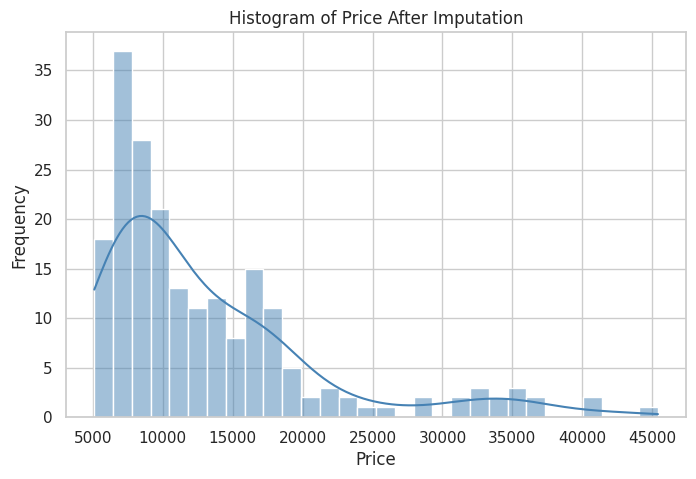

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram of price with new data
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='steelblue')
plt.title("Histogram of Price After Imputation")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


The results show that missnig data has been filled in appropriately.

###**Categorical Encoding**:

**Symboling** is a categorical/ordinal datatype and because it is already numeric and ordered, it can be used as is for machine learning algorithms.

**Make** and **Engine-type** are both categorical/nominal datatypes. To prepare these data values for machine learning, we can use One Hot Encoding. This avoids introducting a false ordering but still allows models to interpret each brand or engine type as a seperate factor. We want distinct catergories with no ranking.

In [46]:
#Copy original df
df_prepared = df.copy()

#Check initial types
print("Data types before encoding:")
print(df_prepared[['symboling', 'make', 'engine-type']].dtypes)

#Apply one-hot encoding to make and engine type
df_prepared = pd.get_dummies(df_prepared, columns=['make', 'engine-type'], drop_first=True)

#Veiw results
df_prepared[['symboling'] + [col for col in df_prepared.columns if col.startswith('make_') or col.startswith('engine-type_')]].head()


Data types before encoding:
symboling       int64
make           object
engine-type    object
dtype: object


,symboling,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


###**Dimensionality Reduction**:
To reduce redundency amoung highly correlated numeric features, we apply PCA to the following: wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, horse-power, peak-rpm, city-mpg. PCA will tranform these features into a new set of uncorrelated orthogonal variables.

PCA is sensitive to scale, so all variables are first scaled using StandardScaler before PCA is applied. After it is applied and the principal components are computed, we plot the cumulative explained variance to help find the variablity in the new data.

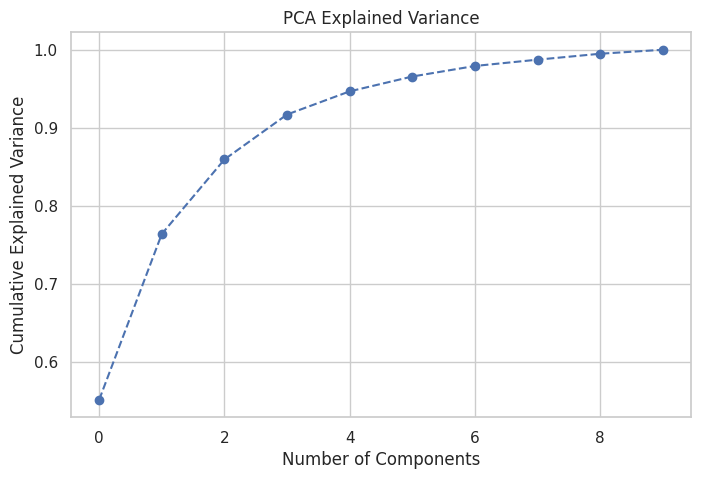

Component 1: 0.5513 (55.13% cumulative)
Component 2: 0.2125 (76.39% cumulative)
Component 3: 0.0955 (85.94% cumulative)
Component 4: 0.0576 (91.70% cumulative)
Component 5: 0.0297 (94.67% cumulative)
Component 6: 0.0190 (96.57% cumulative)
Component 7: 0.0135 (97.92% cumulative)
Component 8: 0.0081 (98.73% cumulative)
Component 9: 0.0076 (99.49% cumulative)
Component 10: 0.0051 (100.00% cumulative)
PCA Result: 6 components explain at least 95% of the total variance.


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Import StandardScaler

#Features used
pca_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight',
                'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']

#Scale features
X_std = StandardScaler().fit_transform(df_encoded[pca_features].astype(float))

#Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

#Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

#Show how much variance each component explains
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f} ({np.cumsum(pca.explained_variance_ratio_)[i]*100:.2f}% cumulative)")


#Determine number of components for 95% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"PCA Result: {n_components} components explain at least 95% of the total variance.")

Our results show that 6 principal components have at least 95% variance. Therefor, we can reduce our data from 10 to 6 components without losing significant information.

## Works Cited

1. Dua, D. & Graff, C. (2019). **UCI Machine Learning Repository**: Automobile Data Set. Irvine, CA: University of California, School of Information and Computer Science.  
   [https://archive.ics.uci.edu/ml/datasets/Automobile](https://archive.ics.uci.edu/ml/datasets/Automobile)
